In [2]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

# Customizing the Line Chart from 12_Exercise_Trending_Skills.ipynb

In [3]:
# Filter for 'Data Analyst' roles
df_DA = df[df['job_title_short'] == 'Data Analyst'].copy()

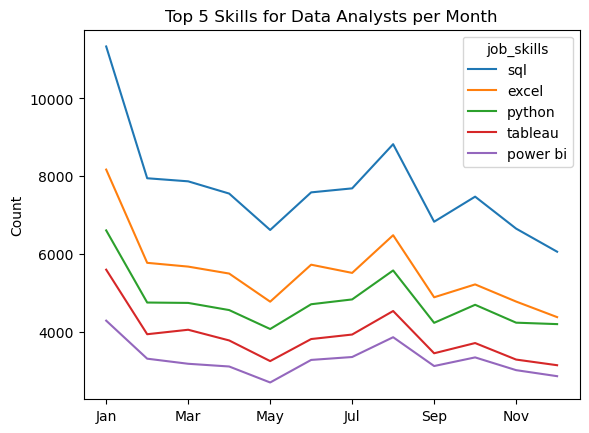

In [4]:
# create a new column for month number
df_DA['job_posted_month_no'] = df_DA['job_posted_date'].dt.month

# explode the job_skills column and pivot
df_DA_explode = df_DA.explode('job_skills')
df_DA_pivot = df_DA_explode.pivot_table(index='job_posted_month_no', columns='job_skills', aggfunc='size', fill_value=0)

# sort the skills by count
df_DA_pivot.loc['Total'] = df_DA_pivot.sum()
df_DA_pivot = df_DA_pivot[df_DA_pivot.loc['Total'].sort_values(ascending=False).index]
df_DA_pivot = df_DA_pivot.drop('Total')

# use month names for plotting
df_DA_pivot = df_DA_pivot.reset_index()
df_DA_pivot['job_posted_month'] = df_DA_pivot['job_posted_month_no'].apply(lambda x: pd.to_datetime(x, format= '%m').strftime('%b'))
df_DA_pivot = df_DA_pivot.set_index('job_posted_month')
df_DA_pivot = df_DA_pivot.drop(columns= 'job_posted_month_no')

# get the top 5 skills
df_DA_pivot.iloc[:, :5].plot(kind='line')

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

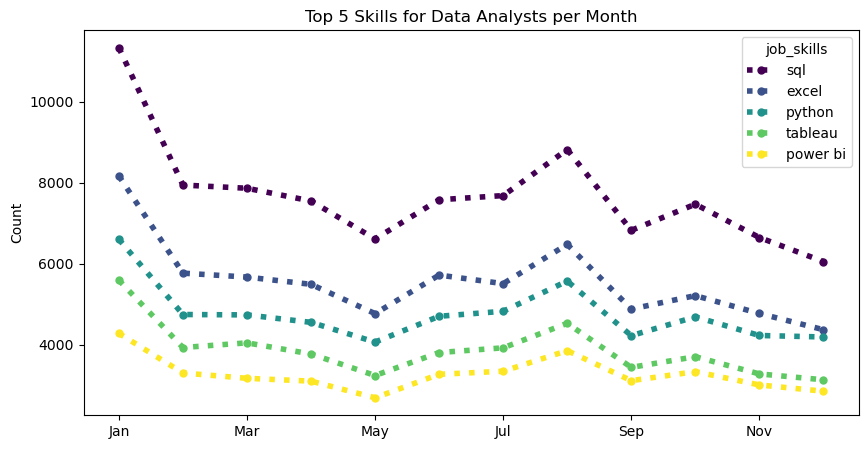

In [5]:
df_DA_pivot.iloc[:, :5].plot(
    kind='line', 
    linewidth=4,
    linestyle=':', #this turns the line into dots. -- will make it into a dashed line. -. will make into a dash-dot line.
    colormap='viridis',
    marker='o', #this'll give u a filled dot as the marer. * this'll give u an asterick marker point.
    markersize= 5,
    figsize= (10, 5) #this specifies the width and height of the figure
)

plt.title('Top 5 Skills for Data Analysts per Month')
plt.ylabel('Count')
plt.xlabel('')
plt.show()

# Customizing the Scatter Plot from 15_Matplotlib_Scatter_Plot.ipynb

In [20]:
# explode the job_skills into individual rows
df_exploded = df.explode('job_skills')

# calculate the median salary and count of job postings per skill
skill_stats = df_exploded.groupby('job_skills').agg(
    skill_count = ('job_skills', 'count'),
    median_salary = ('salary_year_avg', 'median') 
)

# limit to the top skills
skill_count = 20
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(skill_count)

skill_stats

,skill_count,median_salary
job_skills,,
sql,384849,120000.0
python,380909,125000.0
aws,145381,135000.0
azure,132527,125000.0
r,130892,119550.0
tableau,127213,111175.0
excel,127018,92500.0
spark,114609,140000.0
power bi,98147,102000.0


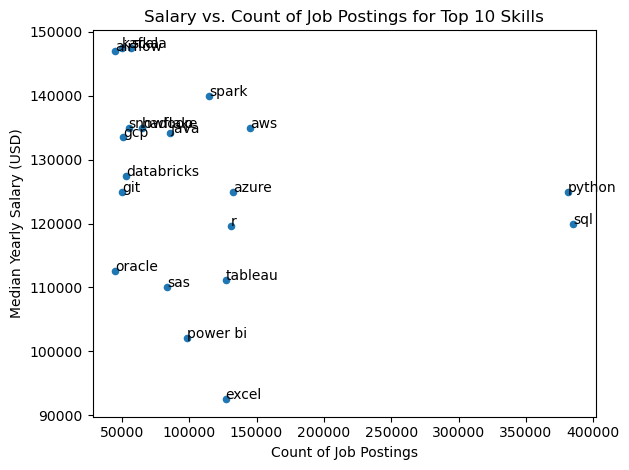

In [21]:
skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()

for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt) 

plt.show()

To customize this chart, we are going to use the adjust_text() function of Matplotlib

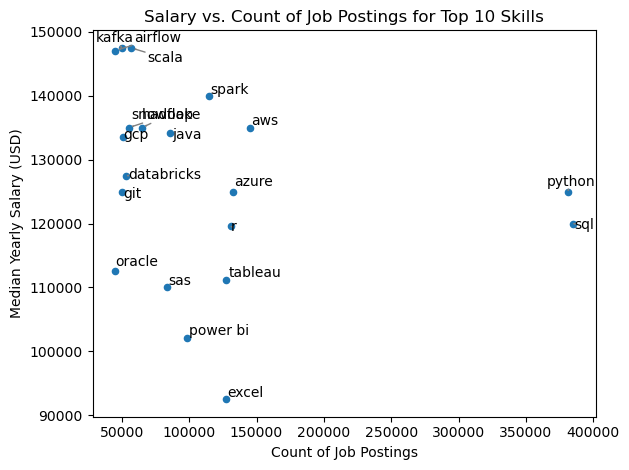

In [22]:
from adjustText import adjust_text

skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1)) #lw means line width

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

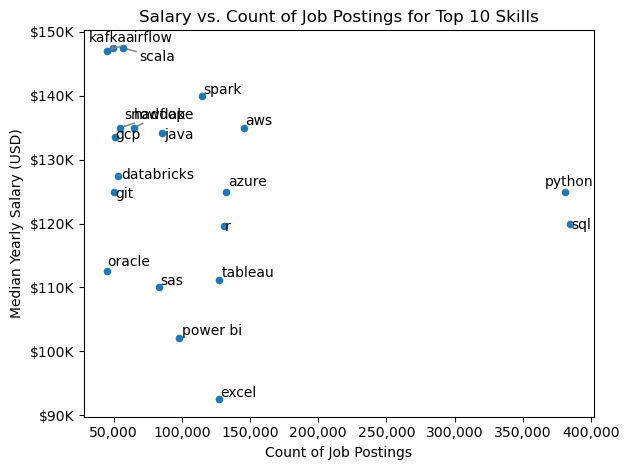

In [23]:
# we wanna change the way the values appear on the y axis

skill_stats.plot(kind='scatter', x= 'skill_count', y= 'median_salary')

texts = []
for i, txt in enumerate(skill_stats.index):
    texts.append(plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt))
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray', lw=1)) #lw means line width

ax = plt.gca() # gac means get current axis
# Format y-axis as $xxxK:
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
# Format x-axis with commas:
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{int(x):,}'))

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary (USD)')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()